Dataset Link : https://archive.ics.uci.edu/ml/datasets/Early+biomarkers+of+Parkinson%E2%80%99s+disease+based+on+natural+connected+speech

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch

The dataset include 30 patients with early untreated Parkinson's disease (PD), 50 patients with REM sleep behaviour disorder (RBD), which are at high risk developing Parkinson's disease or other synucleinopathies; and 50 healthy controls (HC). All patients were scored clinically by a well-trained professional neurologist with experience in movement disorders. All subjects were examined during a single session with a speech specialist. All subjects performed reading of standardized, phonetically-balanced text of 80 words and monologue about their interests, job, family or current activities for approximately 90 seconds. Speech features were automatically analyzed by HlavniÄka et al. (2017).

Participant code = unique code for identification of a subject and diagnosis

30 Parkinson's disease (PD)\
50 REM sleep behaviour disorder (RBD)\
50 healthy controls (HC)


Speech examination: speaking task of reading passage = speech features analyzed on reading passage\
Speech examination: speaking task of monologue = speech features analyzed on monologue

In [2]:
df = pd.read_csv('dataset.csv',decimal=",") 
df["Diagnosis_Label"] = df["Participant code"].apply(lambda x: x[0:2])

There is a 3 class number. Class Names and Counts;

In [4]:
df["Diagnosis_Label"].value_counts()

RB    50
HC    50
PD    30
Name: Diagnosis_Label, dtype: int64

First 5 row of data set

In [5]:
df.head()

,Participant code,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,...,Duration of pause intervals (ms).1,Duration of voiced intervals (ms).1,Gaping in-between voiced\nintervals (-/min),Duration of unvoiced stops (ms).1,Decay of unvoiced fricatives (?/min),Relative loudness of respiration (dB).1,Pause intervals per respiration (-).1,Rate of speech respiration (- /min),Latency of\nrespiratory exchange (ms).1,Diagnosis_Label
0,PD01,58,F,No,56,2,No,No,No,No,...,158,318,49.01,22.37,0.588,-19.77,6,13.81,127,PD
1,PD02,68,F,No,67,1,No,No,No,No,...,295,264,40.56,26.88,-0.825,-23.26,4,21.77,313,PD
2,PD03,68,M,No,67,1,No,No,No,No,...,280,317,48.97,22.37,-0.955,-13.29,4,22.52,201,PD
3,PD04,75,M,No,73,2,No,No,No,No,...,397,800,18.69,49.37,0.791,-25.08,2,14.37,151,PD
4,PD05,61,M,Yes,60,0.7,No,No,No,No,...,206,480,33.54,26.87,0.075,-22.32,5,14.61,151,PD


Number of unique values

In [6]:
df.nunique()

Participant code                                   130
Age (years)                                         39
Gender                                               2
Positive history of Parkinson disease in family      3
Age of disease onset (years)                        35
                                                  ... 
Relative loudness of respiration (dB).1            121
Pause intervals per respiration (-).1               14
Rate of speech respiration           (- /min)      128
Latency of\nrespiratory exchange (ms).1             99
Diagnosis_Label                                      3
Length: 66, dtype: int64

# 1. Data Analysis

## 1.1. Missing Values

There isn't null value for columns but there is "-" values in dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 66 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   Participant code                                                                      130 non-null    object
 1   Age (years)                                                                           130 non-null    int64 
 2   Gender                                                                                130 non-null    object
 3   Positive history of Parkinson disease in family                                       130 non-null    object
 4   Age of disease onset (years)                                                          130 non-null    object
 5   Duration of disease from first symptoms (years)                                       130 no

For patients labeled healthy control, "clinical information" columns "-" is skipped as there are no signs of disease. The values 0 and no can be assigned instead. But this columns meaningless to predict disease. It can be drop.

Data containing "speech examination" columns and "Medication columns" are not null for all diagnoses

For patients labeled healthy control, columns containing "UPDRS III motor scale: specific items" data are given as "-". It can give 0 data for these. Because there is no test for this patients.

For patients labeled healthy control and RBD, "Hoehn & Yahr scale(-)" column data are given as "-". It can give 0 data for these. Because there is no test for this patients.

For patients labeled healthy control, "UPDRS III total (-)" column data are given as "-". It can give 0 data for these. Because there is no test for this patients.

In [8]:
# "Clinical Information" columns
df["Positive history of Parkinson disease in family"] = df["Positive history of Parkinson disease in family"].apply(lambda x : "No" if x=="-" else x)
df["Age of disease onset (years)"] = df["Age of disease onset (years)"].apply(lambda x : 0 if x=="-" else x)
df["Duration of disease from first symptoms (years)"] = df["Duration of disease from first symptoms (years)"].apply(lambda x : 0 if x=="-" else x)

In [9]:
# "Overview of motor examination" columns
df["Hoehn & Yahr scale (-)"] = df["Hoehn & Yahr scale (-)"].apply(lambda x : 0 if x=="-" else x)
df["UPDRS III total (-)"] = df["UPDRS III total (-)"].apply(lambda x : 0 if x=="-" else x)

In [10]:
# "UPDRS III motor scale: specific items" columns
for colName in df.iloc[:, 14:41]:
    df[colName] = df[colName].apply(lambda x : 0 if x=="-" else x)

## 1.2. Data Conversion

Object type to float type

In [11]:
for col in df.columns:
    try:
        df[col] = df[col].apply(lambda x:float(x))
    except:
        pass

Conversion of categorical columns

In [12]:
categorical_colums = ["Gender", "Positive history of Parkinson disease in family", "Antidepressant therapy", "Antiparkinsonian medication", "Antipsychotic medication", "Benzodiazepine medication"]
for col in categorical_colums:
    df[col] = df[col].apply(lambda x: 0 if (x.startswith("No") or x.startswith("M")) else 1)

Dropping of irrelevant column

In [13]:
df = df.drop("Participant code", axis=1)

Dropping of meaningless values

In [14]:
df = df.drop(["Positive history of Parkinson disease in family", "Age of disease onset (years)", "Duration of disease from first symptoms (years)"], axis=1)

## 1.3. Multi Variable Analysis

With the graph drawn, the distinctiveness of the features in the dataset in the classification is shown.

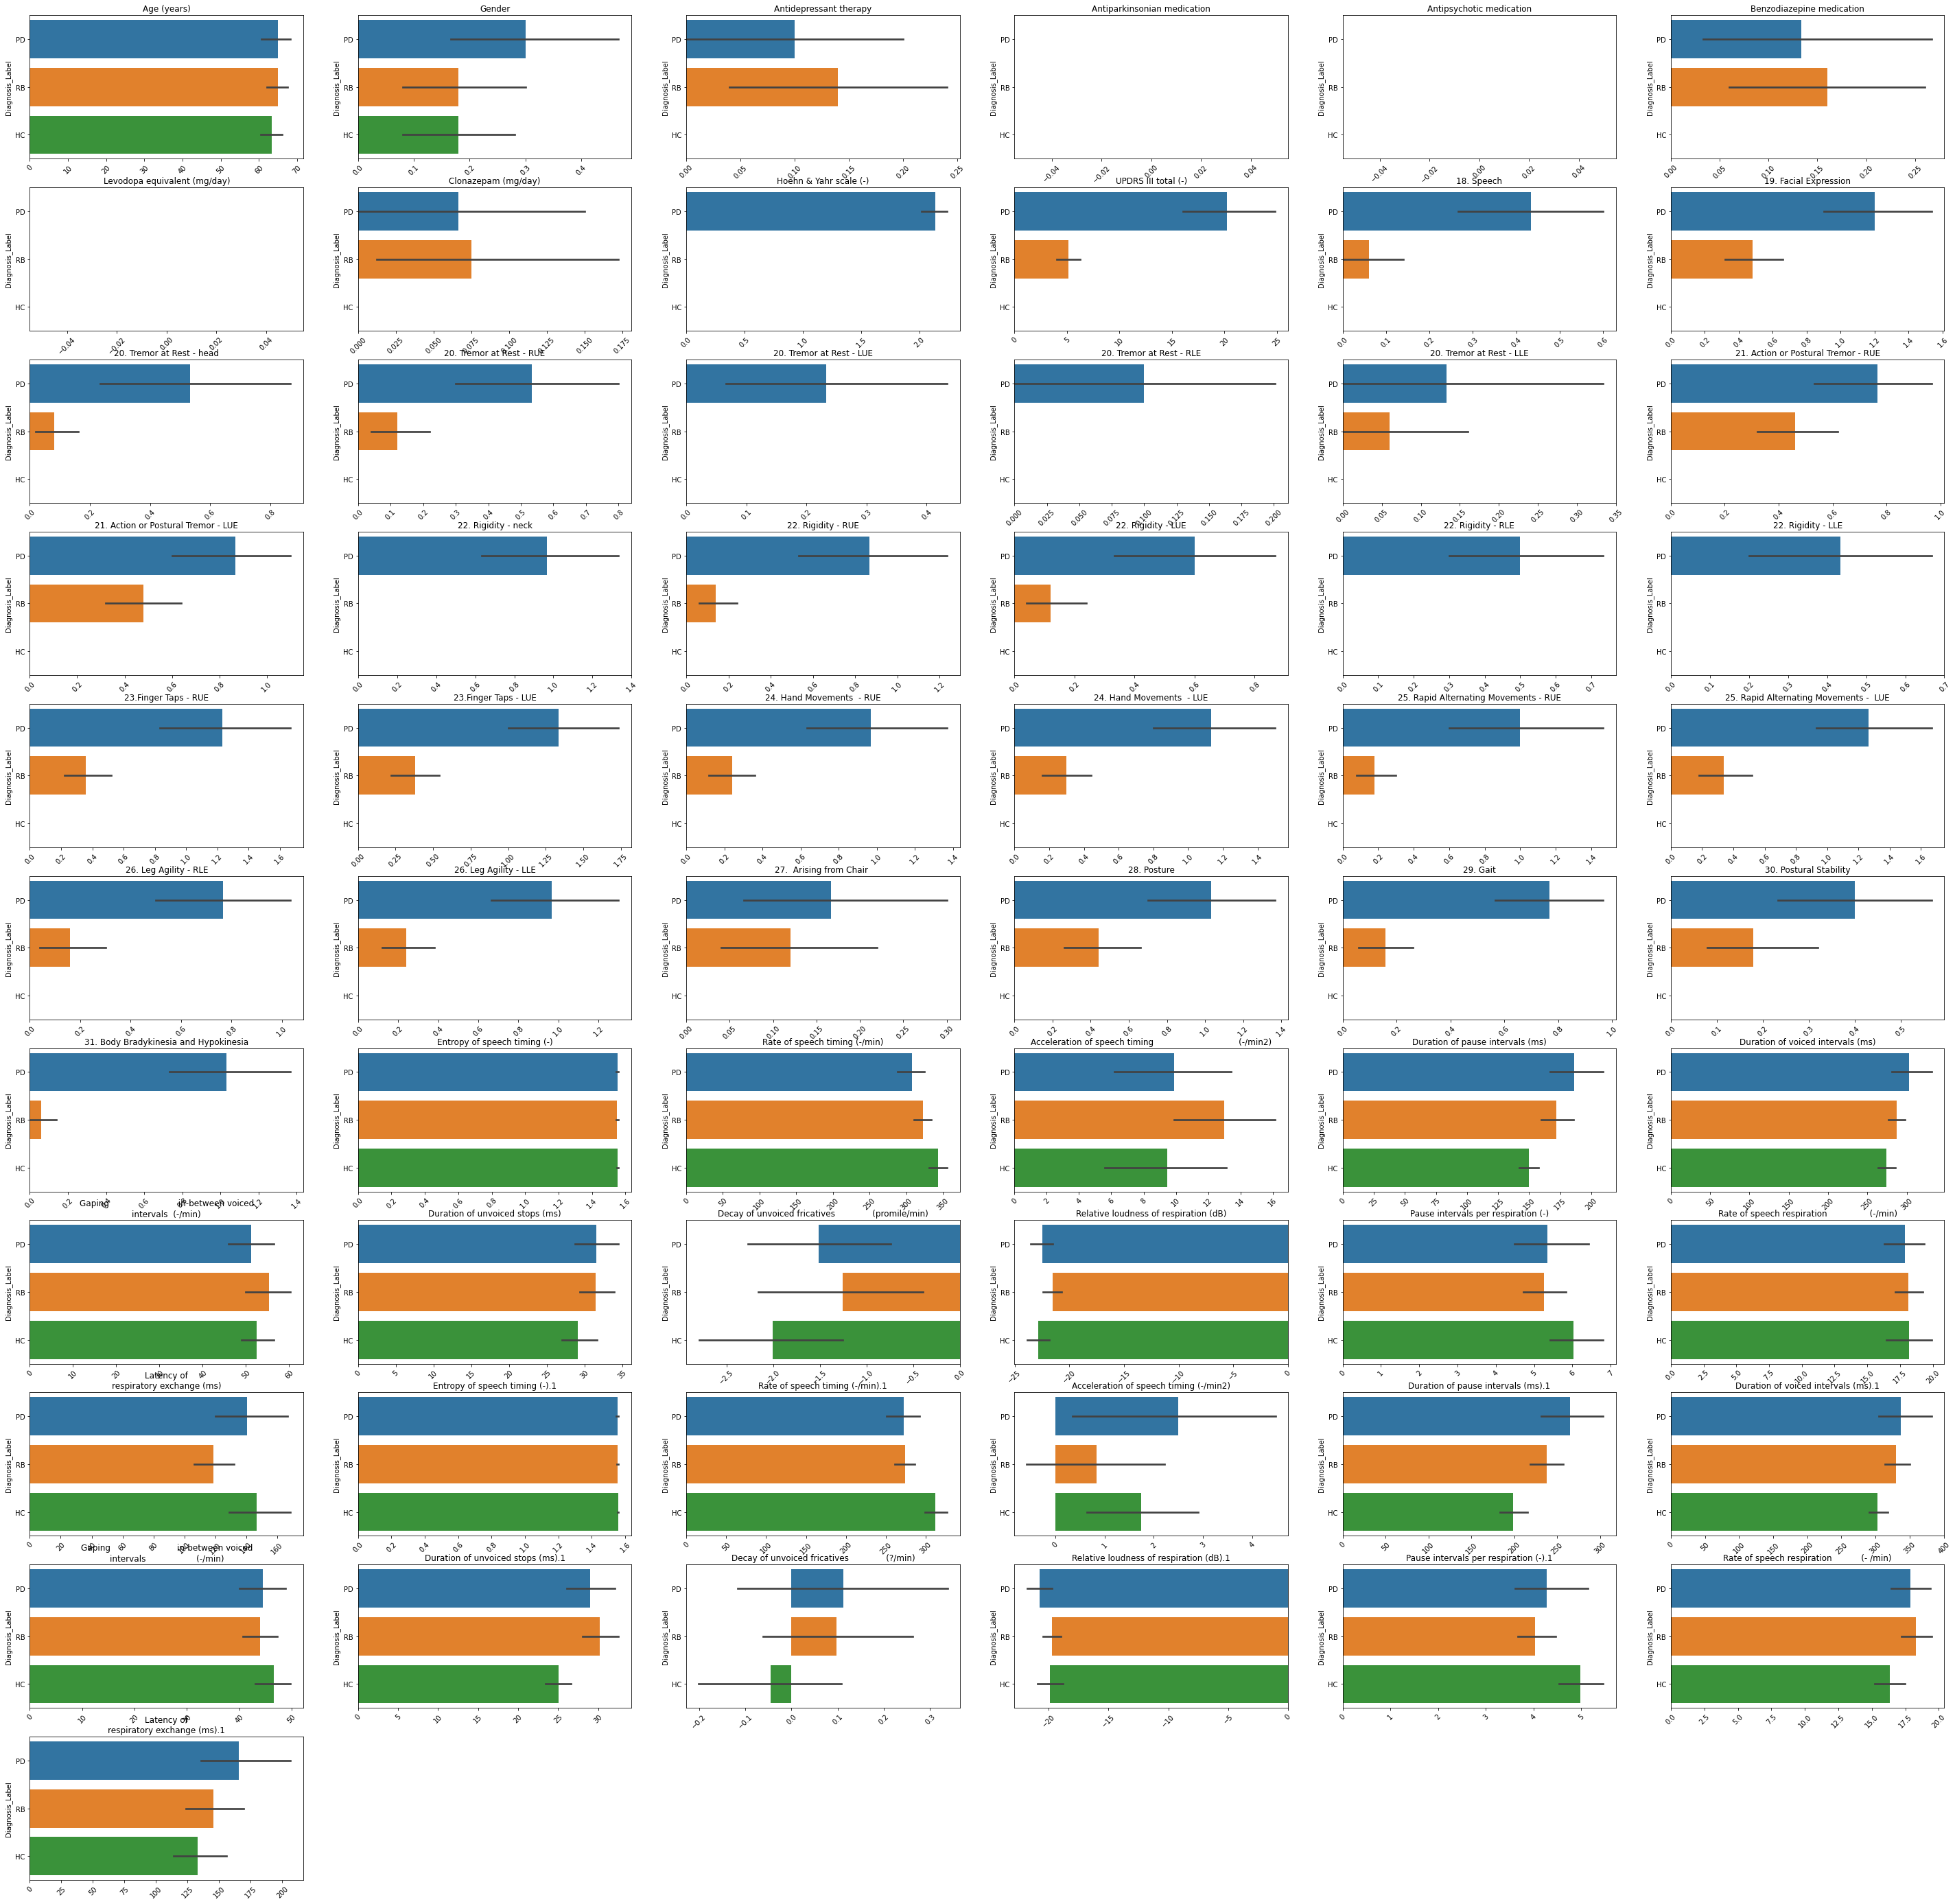

In [15]:
plt.figure(figsize=(50,50))
i=0
for col in df.columns:
  if col == "Diagnosis_Label":
    break
  i = i + 1
  plt.subplot(11,6,i)
  sns.barplot(data=df, x=col, y="Diagnosis_Label")
  plt.title(f"{col}")
  plt.xticks(rotation=45)
  plt.xlabel("")

plt.show()

## 1.4. Outlier Analysis for numerical values

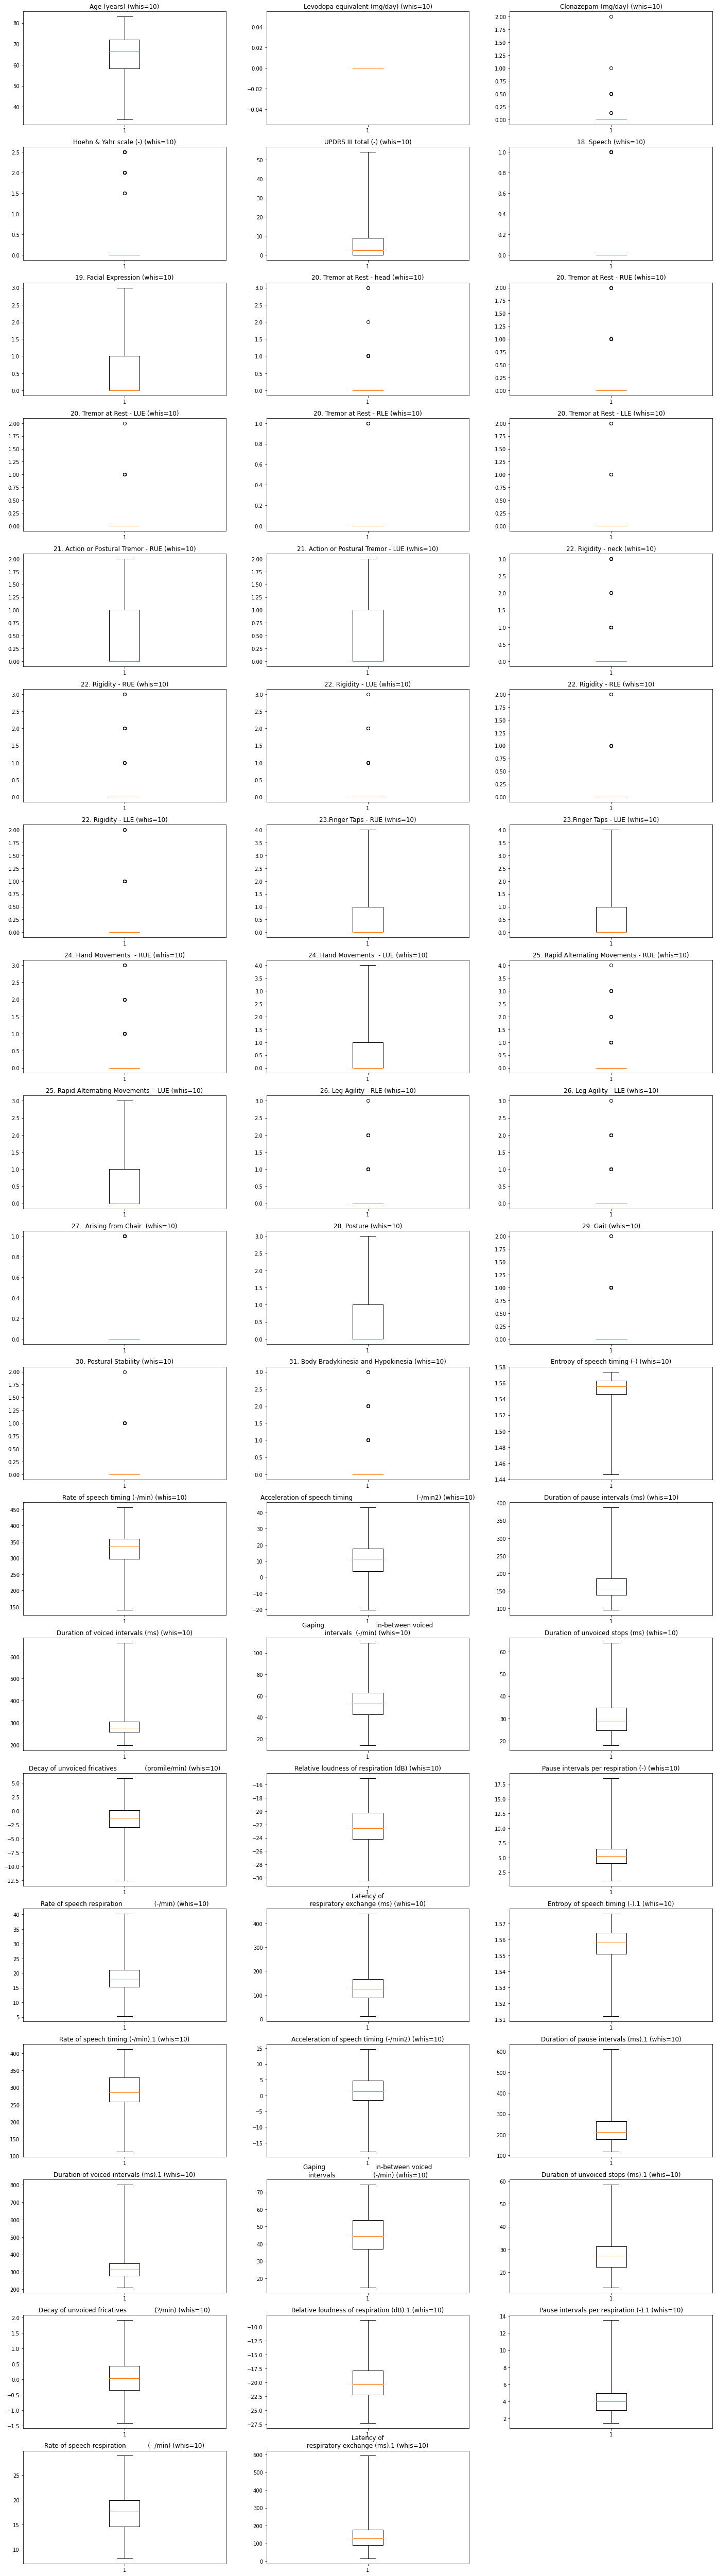

In [16]:
plt.figure(figsize=(24,96))
count = 0
for col in df.columns:
  if df[col].dtype == "float64":
    count+=1
    plt.subplot(20,3,count)
    plt.boxplot(df[col], whis=10) # IQR = 10
    plt.title(f"{col} (whis=10)")

plt.show()

The data appearing as Outlier is due to the nature of the feature in the dataset. Therefore, data reduction was not made with outlier analysis.

## 1.5. Scaling

Standard scaling was applied to the data set.

In [17]:
sc = StandardScaler()
for col in df.columns:
  if col == "Diagnosis_Label":
    continue
  df[col] = sc.fit_transform(df[[col]])

# 2. Classification

Since the classification problem in this data set is simple, naive bayes, decision tree and KNN algorithms are used.

In [18]:
X = df.drop("Diagnosis_Label", axis=1)
y = df["Diagnosis_Label"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 2.1. Model Training

Gridsearchcv was used to set the hyperparameters of the models.
Models were trained with parameters obtained from Gridsearchcv.

### 2.1.1. Grid Search

In [19]:
DTC_Classifier = DecisionTreeClassifier()
DTC_params= {"criterion":["entropy"], "min_samples_split": [2, 3, 4], "min_samples_leaf": [1, 2, 4]}
DTC_grid_cv = GridSearchCV(DTC_Classifier, param_grid=DTC_params, cv=4)
DTC_grid_cv.fit(X_train, Y_train)
print("Decision Tree")
print("")
print("Best Params : ", DTC_grid_cv.best_params_)
print("Best Score  : ", DTC_grid_cv.best_score_)


KNN_Classifier = KNeighborsClassifier()
KNN_params= {"n_neighbors":[3,4,5,6,7], "n_jobs": [-1]}
KNN_grid_cv = GridSearchCV(KNN_Classifier, param_grid=KNN_params, cv=4)
KNN_grid_cv.fit(X_train, Y_train)
print("KNN")
print("")
print("Best Params : ", KNN_grid_cv.best_params_)
print("Best Scores : ", KNN_grid_cv.best_score_)


Decision Tree

Best Params :  {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score  :  0.9791666666666667
KNN

Best Params :  {'n_jobs': -1, 'n_neighbors': 3}
Best Scores :  0.67125


### 2.2.2. Train

In [20]:
DTC_Classifier = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2)
DTC_Classifier.fit(X_train, Y_train)

BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

KNN_Classifier = KNeighborsClassifier(n_jobs=-1, n_neighbors=3)
KNN_Classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

### 2.2.3. Model Evaluation

The trained models were tested on the training set.

score : It is found by averaging the model according to the cross validation scores.

accuracy : It is based on the correct prediction/total prediction ratio of the model.

precision, recall, f1 score : With the help of Classification, the results of these evaluation metrics used for sensitive data were obtained.

In [21]:
models = []
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Naive Bayes Classifier', BNB_Classifier))
models.append(('KNN_Classifier', KNN_Classifier))


for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=4)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))

    print(f"----------------------------- {i} Model Evaluation -----------------------------")
    print(f"\nCross Validation Mean Score:\n {scores.mean()}\n")
    print(f"\n Model Accuracy:\n {accuracy}\n")
    print(f"\n Classification report:\n\n {classification}") 

----------------------------- Decision Tree Classifier Model Evaluation -----------------------------

Cross Validation Mean Score:
 0.96875


 Model Accuracy:
 1.0


 Classification report:

               precision    recall  f1-score   support

          HC       1.00      1.00      1.00        39
          PD       1.00      1.00      1.00        21
          RB       1.00      1.00      1.00        37

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97

----------------------------- Naive Bayes Classifier Model Evaluation -----------------------------

Cross Validation Mean Score:
 0.7741666666666667


 Model Accuracy:
 0.8865979381443299


 Classification report:

               precision    recall  f1-score   support

          HC       0.85      1.00      0.92        39
          PD       0.90      0.90      0.90        21
          RB       0.93      0.76      0.84   

## Model Test Accuracy

Function defined to create Confusion Matrix.

The Trained Models were tested on the test set.

Confusion matrix of all models was drawn.

In [22]:
def confusionMatrix(i, cm):
  fig, ax = plt.subplots(figsize=(8,8))
  sns.heatmap(cm, linewidths=1, annot=True, ax=ax, fmt='g')
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title(f'{i} Confusion Matrix')

----------------------------- Decision Tree Classifier Model Test Results -----------------------------

 Model Accuracy:
 0.9393939393939394


 Classification report:

               precision    recall  f1-score   support

          HC       0.85      1.00      0.92        11
          PD       1.00      1.00      1.00         9
          RB       1.00      0.85      0.92        13

    accuracy                           0.94        33
   macro avg       0.95      0.95      0.94        33
weighted avg       0.95      0.94      0.94        33

----------------------------- Naive Bayes Classifier Model Test Results -----------------------------

 Model Accuracy:
 0.7575757575757576


 Classification report:

               precision    recall  f1-score   support

          HC       0.65      1.00      0.79        11
          PD       1.00      0.78      0.88         9
          RB       0.78      0.54      0.64        13

    accuracy                           0.76        33
   macro 

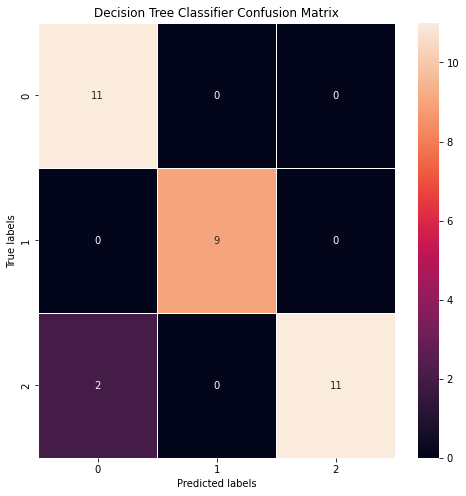

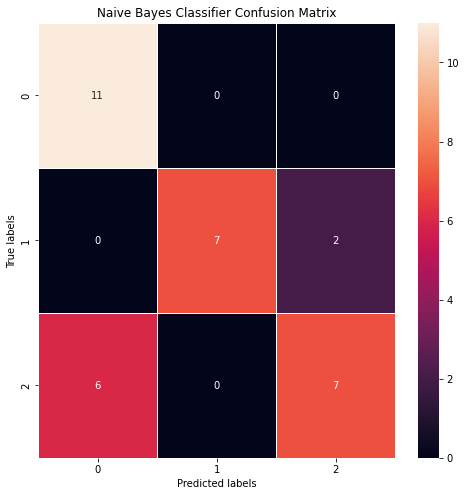

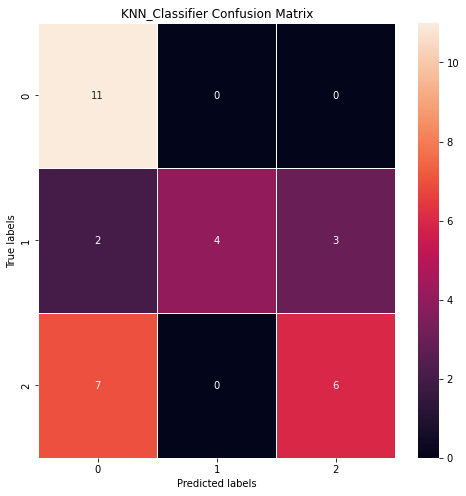

In [23]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 


models = []
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Naive Bayes Classifier', BNB_Classifier))
models.append(('KNN_Classifier', KNN_Classifier))


for i, v in models:
    
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    
    print(f"----------------------------- {i} Model Test Results -----------------------------")
    print(f"\n Model Accuracy:\n {accuracy}\n")
    print(f"\n Classification report:\n\n {classification}")
    confusionMatrix(i, confusion_matrix)

# 3. Clustering

## 3.1. K-Means

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.

In [24]:
X = df.drop("Diagnosis_Label", axis=1)
y = df["Diagnosis_Label"]

In [25]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=1000, random_state=42).fit(X)
predKmeans = kmeans.predict(X)
predKmeans

array([0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1])

PD -> 2

RB -> 1

HC -> 0

## 3.2. GaussianMixture

Gaussian mixture models are a probabilistic model for representing normally distributed subpopulations within an overall population. Mixture models in general don't require knowing which subpopulation a data point belongs to, allowing the model to learn the subpopulations automatically. Since subpopulation assignment is not known, this constitutes a form of unsupervised learning.

In [27]:
predGaussianMixture = GaussianMixture(n_components=3, covariance_type="spherical", n_init=10, random_state=42).fit_predict(X)
predGaussianMixture

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2,
       1, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0],
      dtype=int64)

PD -> 2

RB -> 1

HC -> 0

## 3.3. BIRCH

The Birch builds a tree called the Clustering Feature Tree (CFT) for the given data. The data is essentially lossy compressed to a set of Clustering Feature nodes (CF Nodes). The CF Nodes have a number of subclusters called Clustering Feature subclusters (CF Subclusters) and these CF Subclusters located in the non-terminal CF Nodes can have CF Nodes as children

In [28]:
predBirch = Birch(threshold=0.5, branching_factor=50, n_clusters=3, compute_labels=True, copy=True).fit_predict(X)
predBirch

array([1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

PD -> 0

RB -> 2

HC -> 1

## 3.4. Result

The results obtained as 0, 1, 2 have been converted as abbreviations.

In [29]:
predKmeans_ = pd.Series(predKmeans).apply(lambda x:"HC" if x==0 else "RB" if x==1 else "PD")
predGaussianMixture_ = pd.Series(predGaussianMixture).apply(lambda x:"HC" if x==0 else "RB" if x==1 else "PD")
predBirch_ = pd.Series(predBirch).apply(lambda x:"PD" if x==0 else "HC" if x==1 else "RB")

In [30]:
resultDf = pd.concat([y, predKmeans_, predGaussianMixture_, predBirch_], axis=1)
resultDf = resultDf.rename(columns={0:"Kmeans", 1:"GaussianMixture", 2:"BIRCH"})
resultDf

,Diagnosis_Label,Kmeans,GaussianMixture,BIRCH
0,PD,HC,PD,HC
1,PD,PD,PD,PD
2,PD,PD,PD,PD
3,PD,PD,PD,PD
4,PD,PD,PD,PD
...,...,...,...,...
125,HC,RB,HC,HC
126,HC,HC,HC,HC
127,HC,RB,RB,HC
128,HC,HC,HC,HC


Accuracy Calculation

In [31]:
print("------------------------ACCURACY--------------------------")
for col in resultDf:
    if col == "Diagnosis_Label":
        continue
    totalCount = 0
    count = 0
    for rowDiagnosisLabel, row in zip(resultDf["Diagnosis_Label"], resultDf[col]):
        if rowDiagnosisLabel == row:
            count += 1
        totalCount += 1

    print(f"{col} ALGORITHM ACCURACY : {count*100/totalCount}")

------------------------ACCURACY--------------------------
Kmeans ALGORITHM ACCURACY : 62.30769230769231
GaussianMixture ALGORITHM ACCURACY : 70.76923076923077
BIRCH ALGORITHM ACCURACY : 62.30769230769231


It has been seen that the best clustering algorithm is Gaussian Mixture.